In [1]:
import cmocean.cm as cmo
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import xarray as xr
import geopy.distance
from scipy import spatial
from geopy.distance import great_circle 
from sklearn.metrics import r2_score

import netCDF4 as nc
from csv import writer
import statistics


# Shallow Water aCDOM Scatter

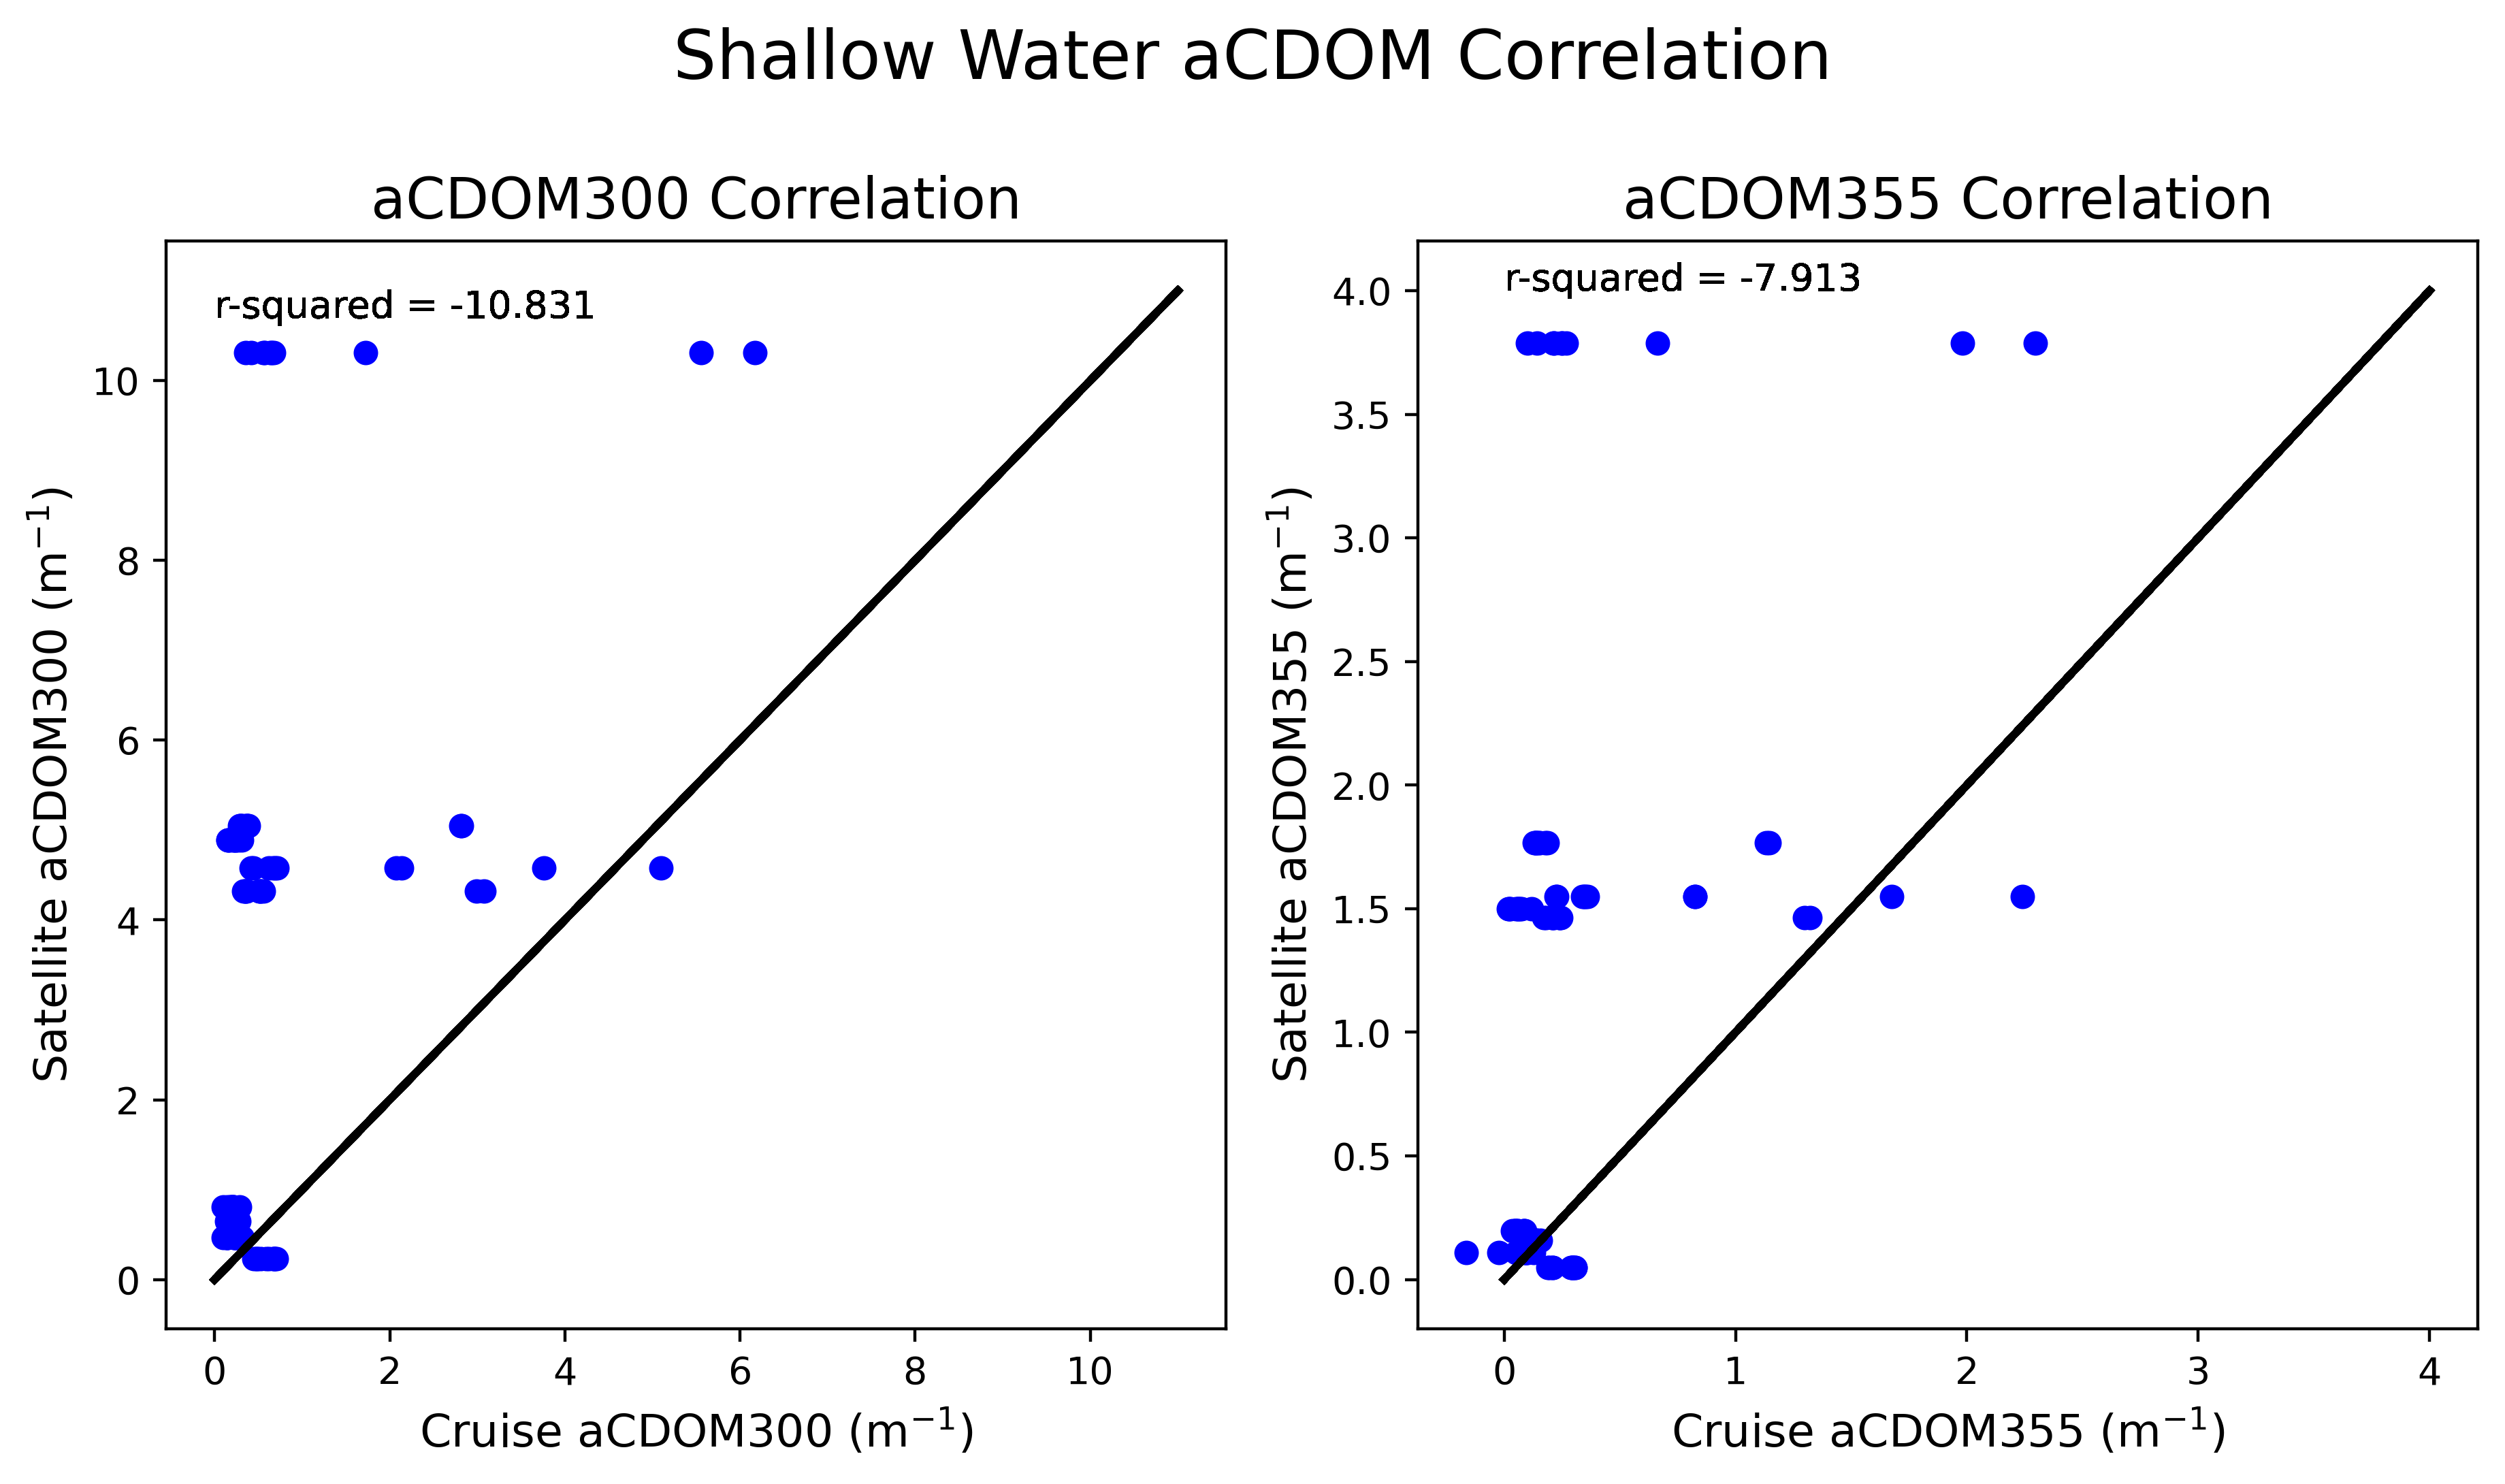

In [12]:
mainfile = '/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/Validation Table Surface Water Redo Depth Edited.csv'
data = pd.read_csv(mainfile)

fig =  plt.figure(figsize=(9.3, 5.4), dpi=400)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

fig.suptitle('Shallow Water aCDOM Correlation', size=18, y=1)

ax1.set_title('aCDOM300 Correlation', fontsize=15)
ax1.set_ylabel('Satellite aCDOM300 (m$^{-1}$)', fontsize=12)
ax1.set_xlabel('Cruise aCDOM300 (m$^{-1}$)', fontsize=12)

ax2.set_title('aCDOM355 Correlation', fontsize=15)
ax2.set_ylabel('Satellite aCDOM355 (m$^{-1}$)', fontsize=12)
ax2.set_xlabel('Cruise aCDOM355 (m$^{-1}$)', fontsize=12)

CaCDOM300 = data['Cruise_aCDOM300'].tolist()
SaCDOM300 = data['Sat_aCDOM300'].tolist()

CaCDOM355 = data['Cruise_aCDOM355'].tolist()
SaCDOM355 = data['Sat_aCDOM355'].tolist()

# data['Cruise DOC'].tolist()[0]
# data['Sat DOC'].tolist()[0]

circlesize = 20
edgesize = 2

#Scatter plot for satellite vs cruise data for 300 
for (x, y) in zip(CaCDOM300, SaCDOM300):
    ax1.scatter(x, y, s=circlesize, c='blue', linewidth=edgesize)
    ax1.plot([0, 11], [0, 11], color='k', linestyle='-', linewidth=2)
    ax1.annotate("r-squared = {:.3f}".format(r2_score(CaCDOM300, SaCDOM300)), (0, 10.7))

# Scatter plot for satellite vs cruise data for 355 
for (a, b) in zip(CaCDOM355, SaCDOM355):
    ax2.scatter(a, b, s=circlesize, c='blue', linewidth=edgesize)
    ax2.plot([0, 4], [0, 4], color='k', linestyle='-', linewidth=2)
    ax2.annotate("r-squared = {:.3f}".format(r2_score(CaCDOM355, SaCDOM355)), (0, 4))

    

fig.tight_layout()
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/aCDOMScatterCorrelation')

        
        

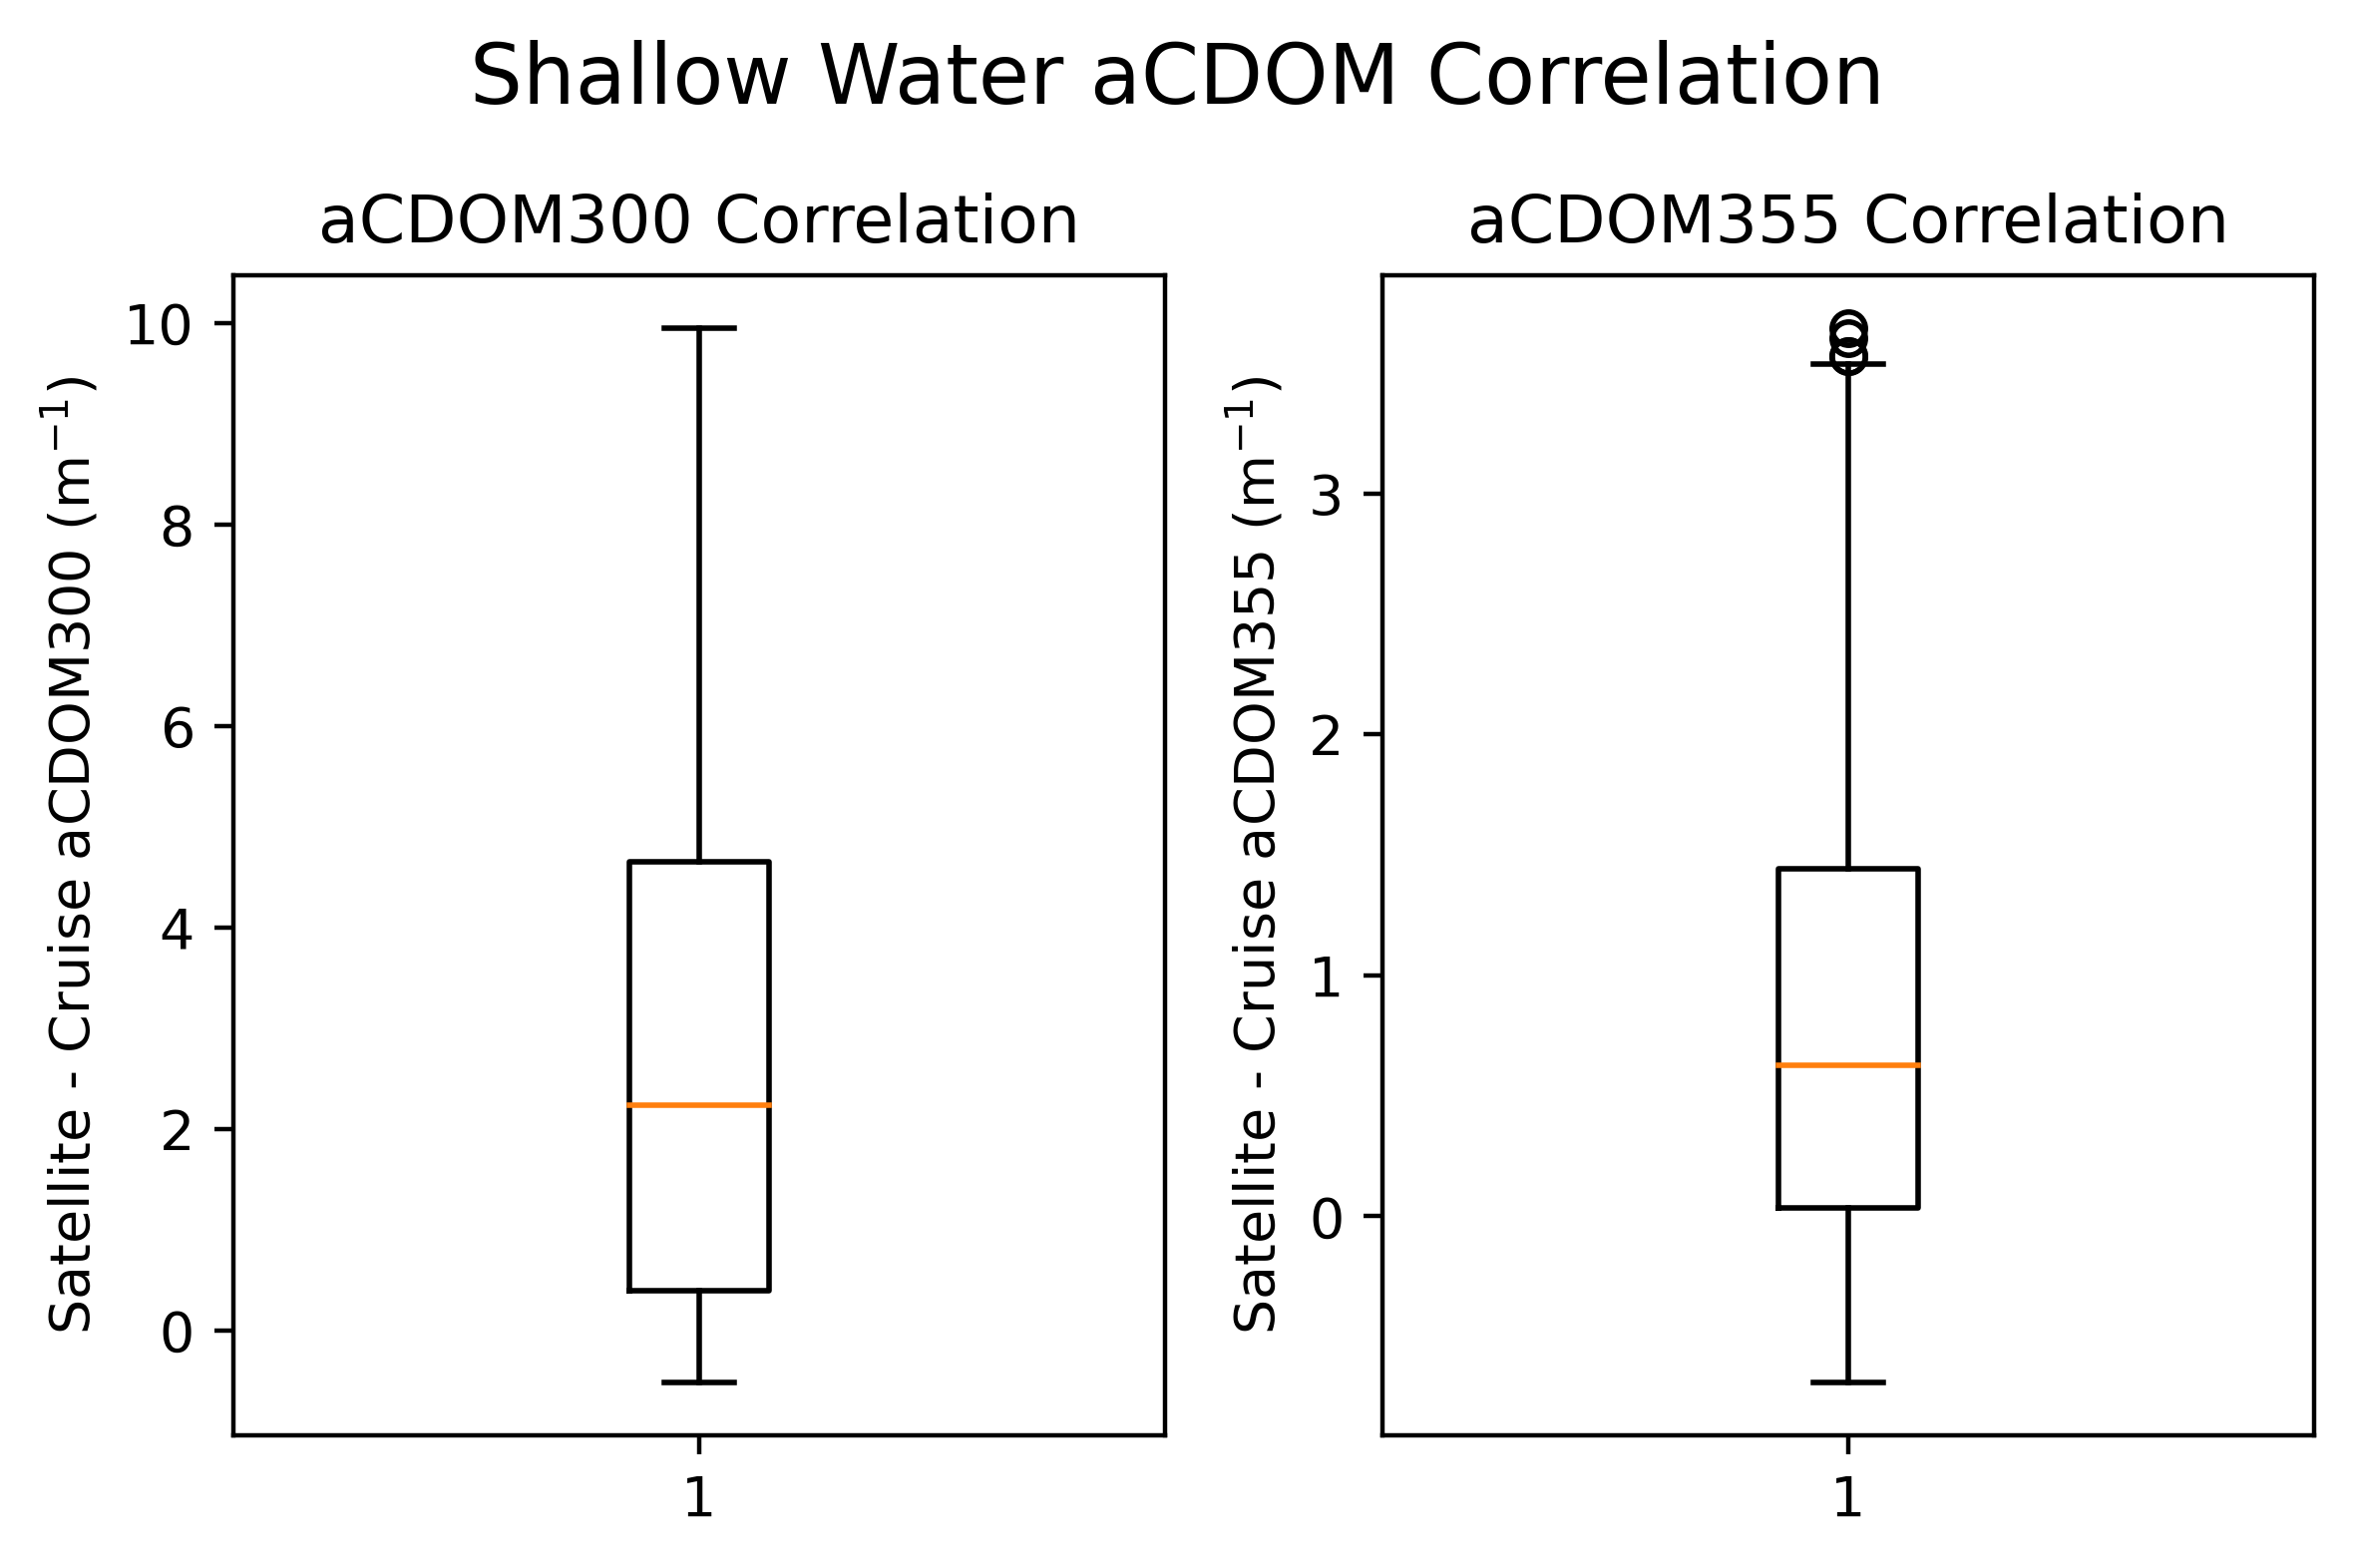

In [10]:
mainfile = '/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/Validation Table Surface Water Redo Depth Edited.csv'
data = pd.read_csv(mainfile)

fig =  plt.figure(figsize=(6, 4), dpi=400)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

fig.suptitle('Shallow Water aCDOM Correlation', size=15, y=0.97)

ax1.set_title('aCDOM300 Correlation', fontsize=12)
ax1.set_ylabel('Satellite - Cruise aCDOM300 (m$^{-1}$)', fontsize=10)

ax2.set_title('aCDOM355 Correlation', fontsize=12)
ax2.set_ylabel('Satellite - Cruise aCDOM355 (m$^{-1}$)', fontsize=10)

#Data:
CaCDOM300 = data['Cruise_aCDOM300'].tolist()
SaCDOM300 = data['Sat_aCDOM300'].tolist()

CaCDOM355 = data['Cruise_aCDOM355'].tolist()
SaCDOM355 = data['Sat_aCDOM355'].tolist()

aCDOM300diff = []
aCDOM355diff = []

i=0
while i < len(CaCDOM300):
    aCDOM300diff.append(SaCDOM300[i]-CaCDOM300[i])
    aCDOM355diff.append(SaCDOM355[i]-CaCDOM355[i])

    i = i+1


ax1.boxplot(aCDOM300diff)
ax2.boxplot(aCDOM355diff)

# #Scatter plot for satellite vs cruise data for 300 
# for (x, y) in zip(CaCDOM300, SaCDOM300):
#     ax1.scatter(x, y, s=circlesize, c='none', edgecolors='blue', linewidth=edgesize)
#     ax1.plot([0, 11], [0, 11], color='k', linestyle='-', linewidth=2)
#     ax1.annotate("r-squared = {:.3f}".format(r2_score(SaCDOM300, CaCDOM300)), (0, 10.3))

# # Scatter plot for satellite vs cruise data for 355 
# for (a, b) in zip(CaCDOM355, SaCDOM355):
#     ax2.scatter(a, b, s=circlesize, c='none', edgecolors='blue', linewidth=edgesize)
#     ax2.plot([0, 4], [0, 4], color='k', linestyle='-', linewidth=2)
#     ax2.annotate("r-squared = {:.3f}".format(r2_score(SaCDOM355, CaCDOM355)), (0, 3.75))

    

fig.tight_layout()
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/aCDOMBoxplotDifference')

        
        

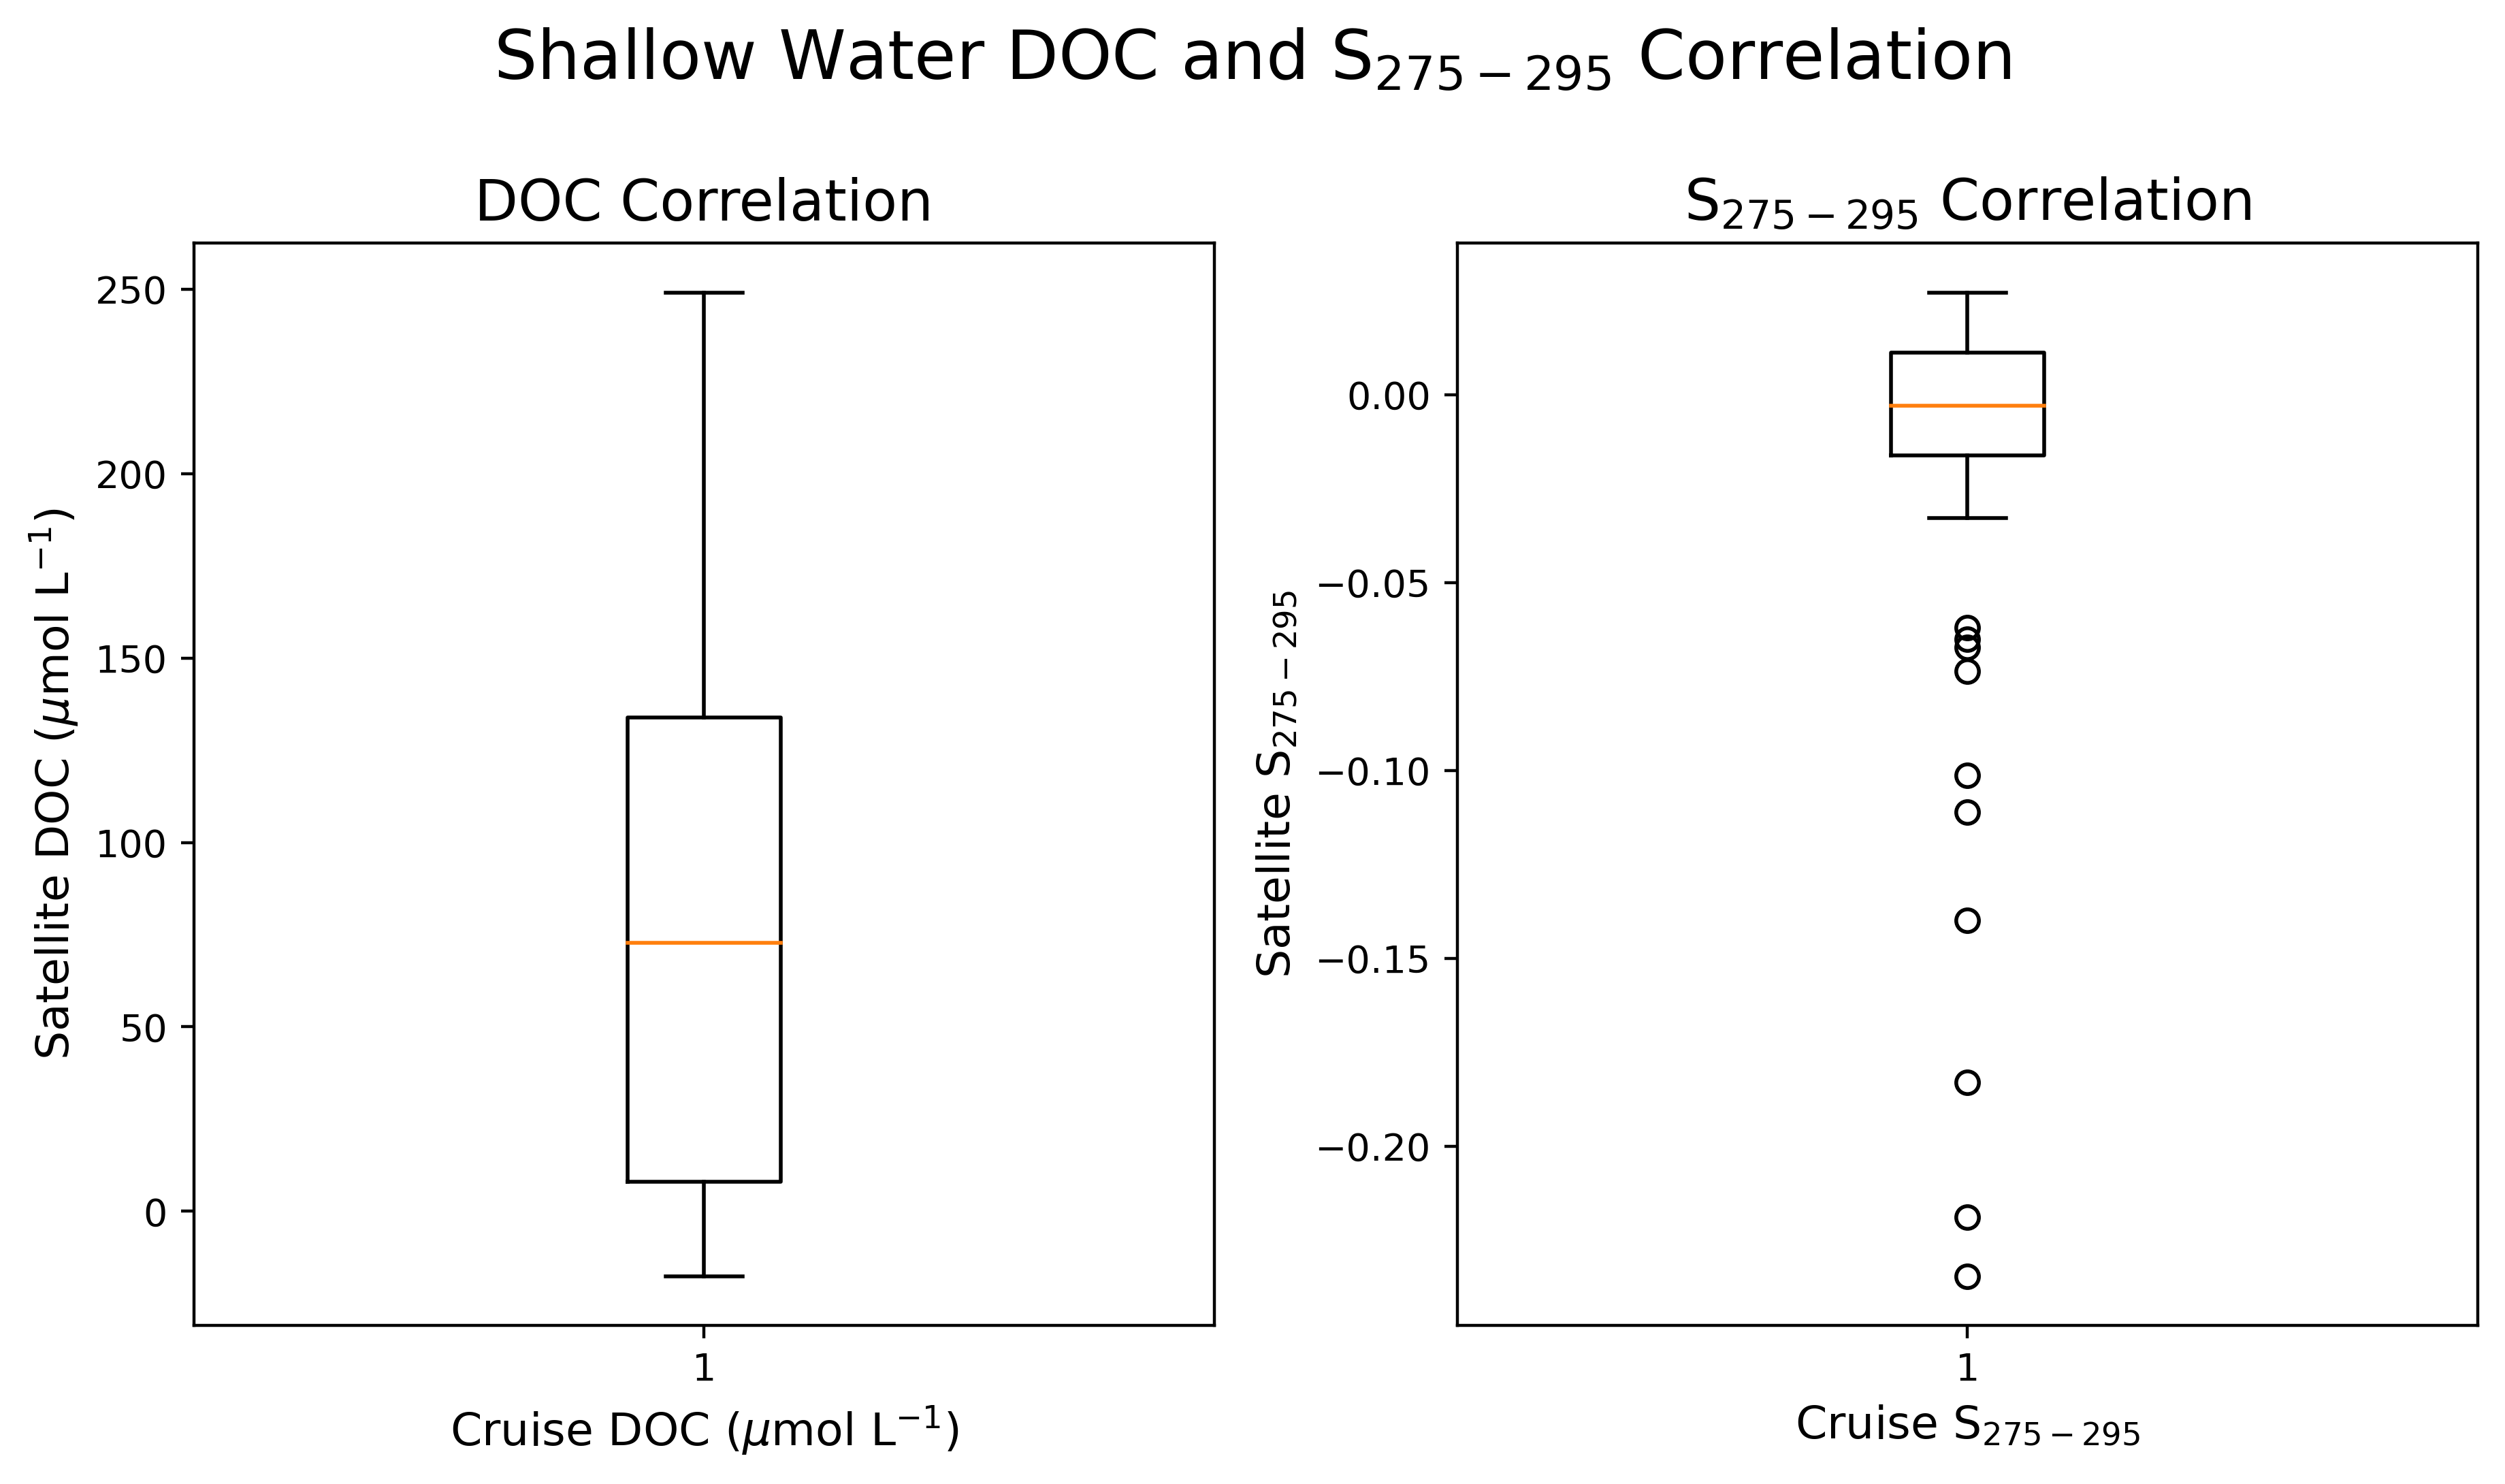

In [15]:
mainfile = '/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/Validation Table Surface Water Redo Depth Edited.csv'
data = pd.read_csv(mainfile)

fig =  plt.figure(figsize=(9.3, 5.4), dpi=400)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

fig.suptitle('Shallow Water DOC and S$_{275-295}$ Correlation', size=18, y=1)

ax1.set_title('DOC Correlation', fontsize=15)
ax1.set_ylabel('Satellite DOC ($\mu$mol L$^{-1}$)', fontsize=12)
ax1.set_xlabel('Cruise DOC ($\mu$mol L$^{-1}$)', fontsize=12)

ax2.set_title('S$_{275-295}$ Correlation', fontsize=15)
ax2.set_ylabel('Satellite S$_{275-295}$', fontsize=12)
ax2.set_xlabel('Cruise S$_{275-295}$', fontsize=12)

CDOC = data['Cruise_DOC'].tolist()
SDOC = data['Sat_DOC'].tolist()

CSS = data['Cruise_S275-295'].tolist()
SSS = data['Sat_S275-295'].tolist()

DOCdiff = []
SSdiff = []

i=0
while i < len(CDOC):
    DOCdiff.append(SDOC[i]-CDOC[i])
    SSdiff.append(SSS[i]-CSS[i])

    i = i+1


ax1.boxplot(DOCdiff)
ax2.boxplot(SSdiff)

    

fig.tight_layout()
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/DOCBoxPlot')

        
        

[111.083333333333, 102.166666666667, 111.208333333333, 122.708333333333, 107.416666666667, 108.458333333333, 122.583333333333, 127.541666666667, 101.75, 106.791666666667, 54.7875, 56.3166666666667, 59.7041666666667, 55.6708333333333, 73.7625, 81.7666666666667, 75.4666666666667, 79.2166666666667, 96.5416666666667, 95.7916666666667, 61.125, 65.025, 62.6333333333333, 62.9208333333333, 71.4791666666667, 74.8708333333333, 84.5833333333333, 81.8791666666667, 146.833333333333, 147.833333333333, 116.166666666667, 129.791666666667, 119.208333333333, 155.333333333333, 100.5, 107.416666666667, 127.458333333333, 128.416666666667, 252.083333333333, 252.916666666667, 80.1041666666667, 82.1, 87.4166666666667, 84.75, 91.8333333333333, 89.7916666666667, 137.916666666667, 134.708333333333, 196.416666666667, 201.125, 114.333333333333, 118.708333333333, 120.75, 113.833333333333, 146.333333333333, 100.75, 118.75, 107.291666666667, 212.083333333333, 211.166666666667, 71.675, 75.675, 78.1333333333333, 69.691

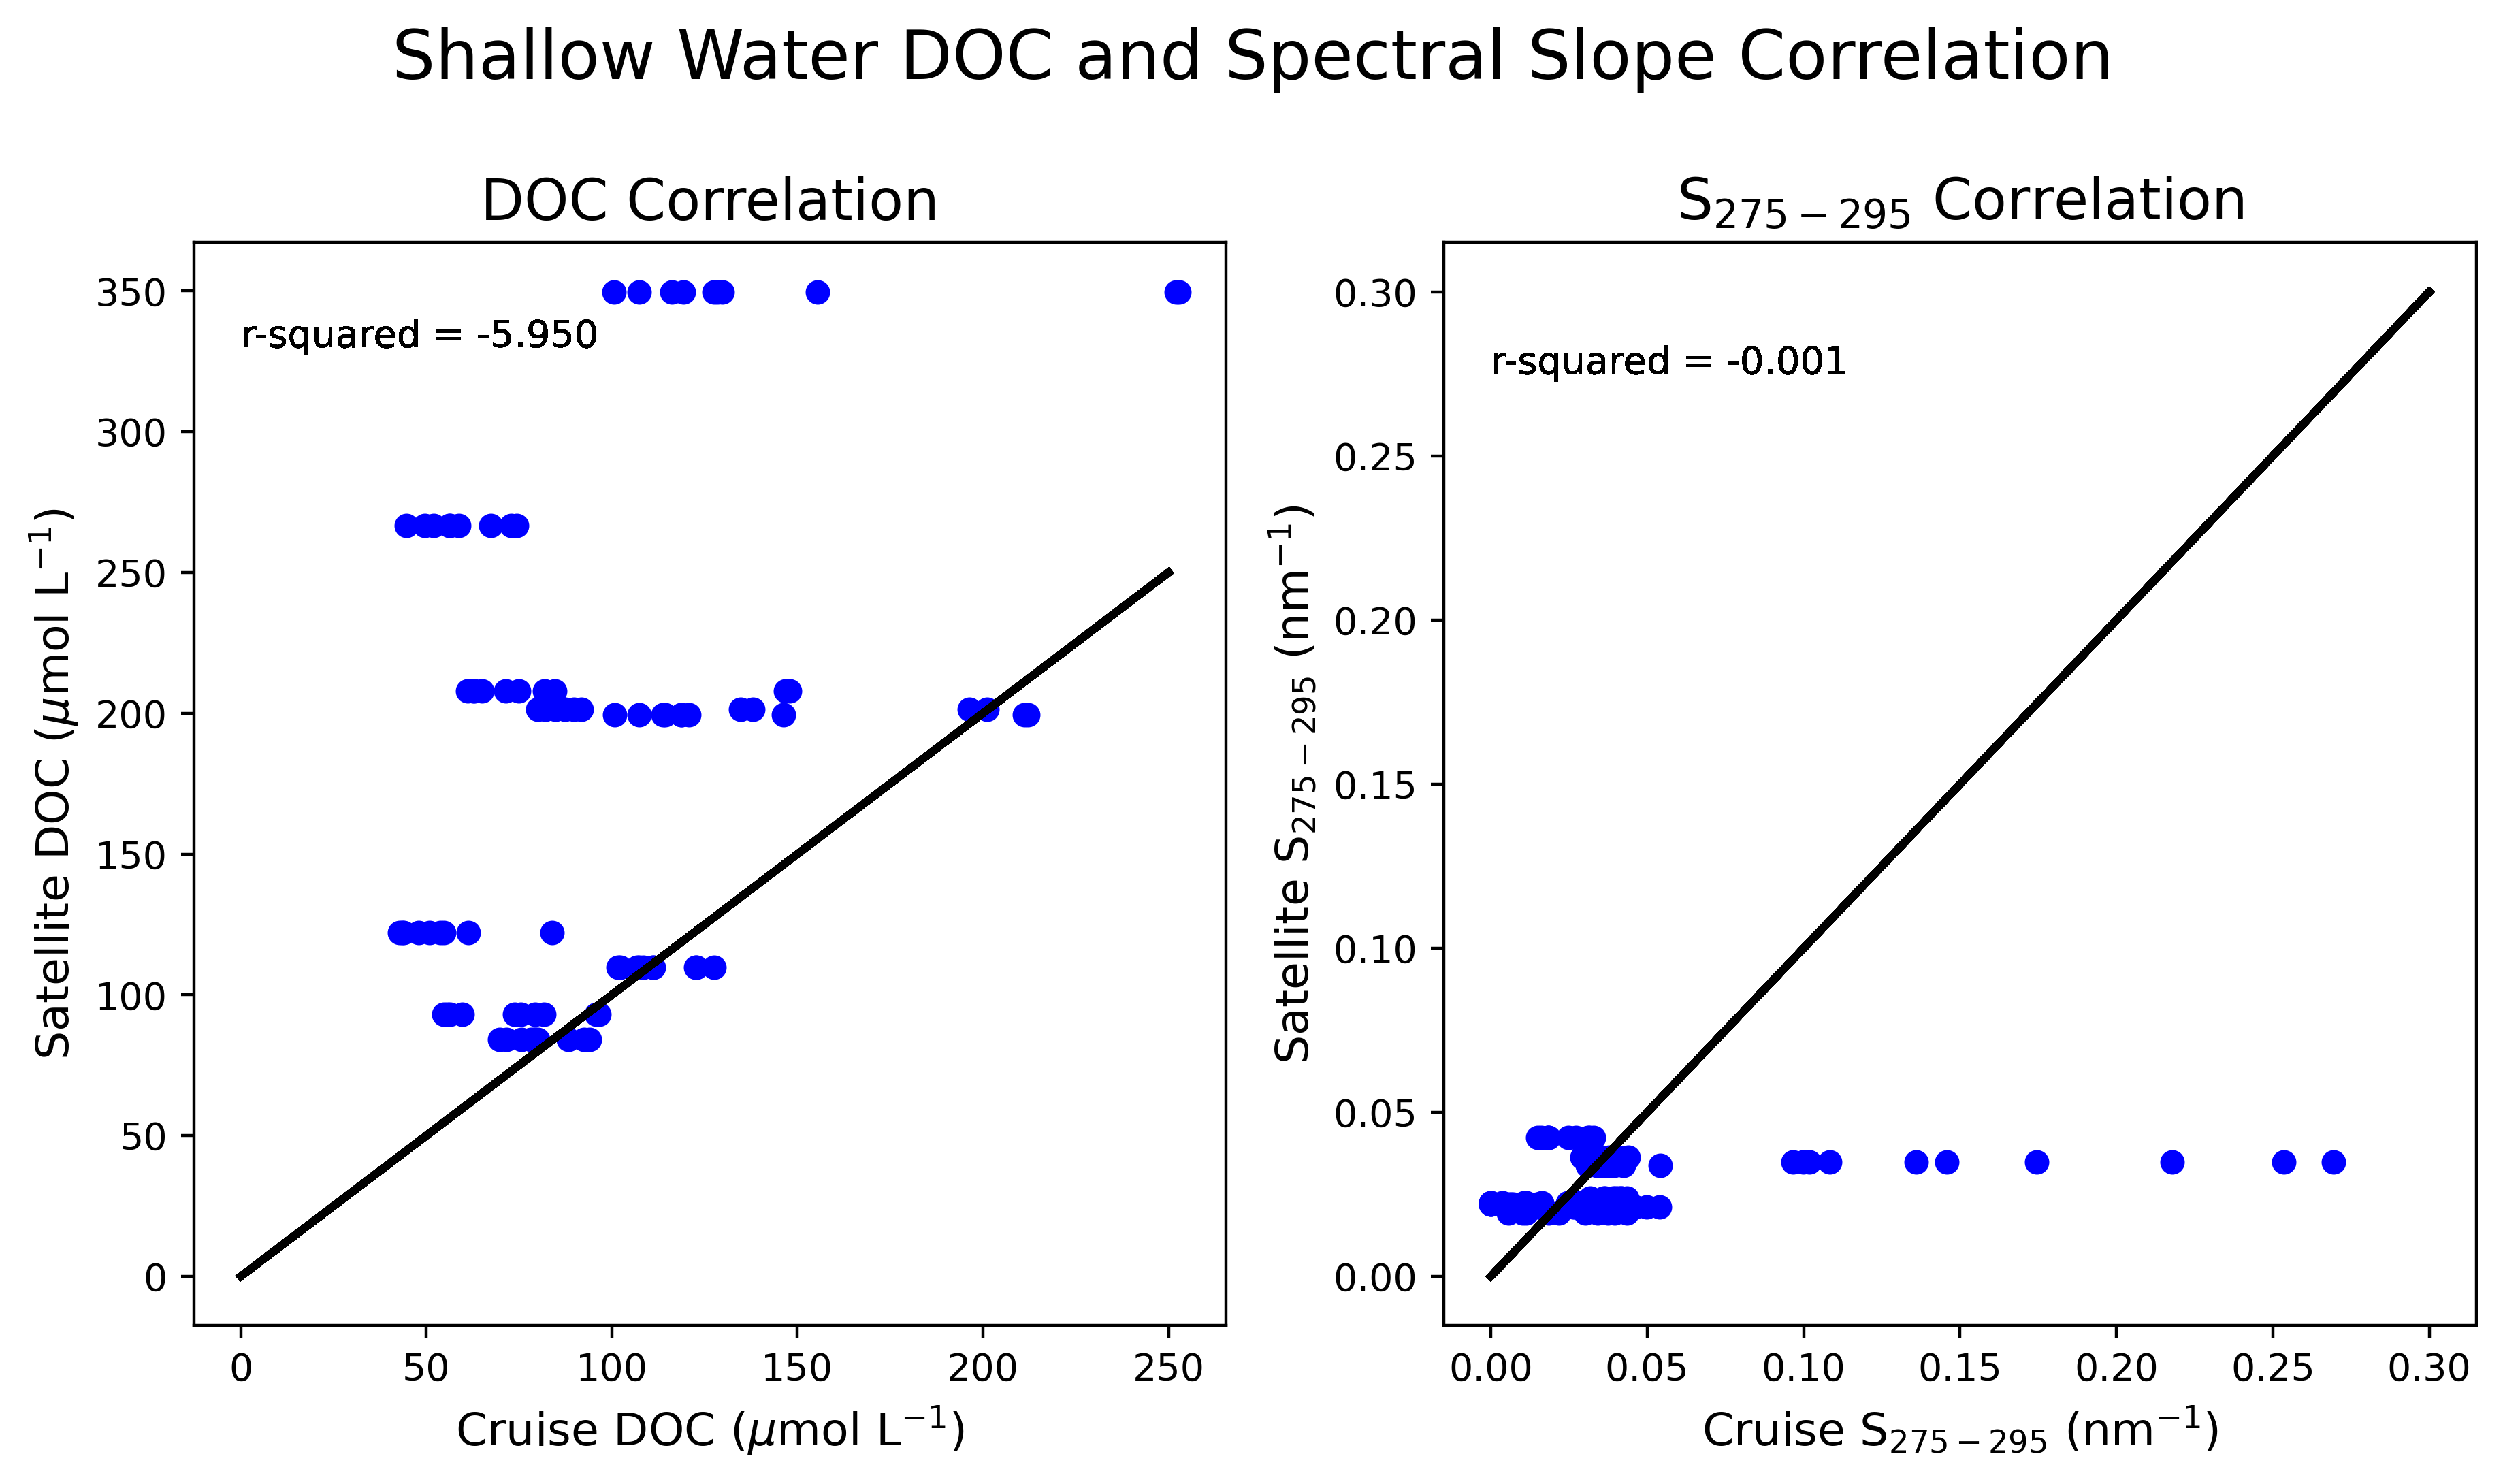

In [14]:
mainfile = '/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/Validation Table Surface Water Redo Depth Edited.csv'
data = pd.read_csv(mainfile)

fig =  plt.figure(figsize=(9.3, 5.4), dpi=400)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

fig.suptitle('Shallow Water DOC and Spectral Slope Correlation', size=18, y=1)

ax1.set_title('DOC Correlation', fontsize=15)
ax1.set_ylabel('Satellite DOC ($\mu$mol L$^{-1}$)', fontsize=12)
ax1.set_xlabel('Cruise DOC ($\mu$mol L$^{-1}$)', fontsize=12)

ax2.set_title('S$_{275-295}$ Correlation', fontsize=15)
ax2.set_ylabel('Satellite S$_{275-295}$ (nm$^{-1}$)', fontsize=12)
ax2.set_xlabel('Cruise S$_{275-295}$ (nm$^{-1}$)', fontsize=12)

CDOC = data['Cruise_DOC'].tolist()
SDOC = data['Sat_DOC'].tolist()

CSS = data['Cruise_S275-295'].tolist()
SSS = data['Sat_S275-295'].tolist()

# data['Cruise DOC'].tolist()[0]
# data['Sat DOC'].tolist()[0]

circlesize = 20
edgesize = 2

#Scatter plot for satellite vs cruise data for 300 
for (x, y) in zip(CDOC, SDOC):
    ax1.scatter(x, y, s=circlesize, c='blue', linewidth=edgesize)
    ax1.plot([0, 250], [0, 250], color='k', linestyle='-', linewidth=2)
    ax1.annotate("r-squared = {:.3f}".format(r2_score(CDOC, SDOC)), (0, 330))

# Scatter plot for satellite vs cruise data for 355 
for (a, b) in zip(CSS, SSS):
    ax2.scatter(a, b, s=circlesize, c='blue', linewidth=edgesize)
    ax2.plot([0, 0.3], [0, 0.3], color='k', linestyle='-', linewidth=2)
    ax2.annotate("r-squared = {:.3f}".format(r2_score(CSS, SSS)), (0, 0.275))

    

fig.tight_layout()
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task8/DOCScatterCorrelation')

        
        